# 3. Analysis & Visualization

In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv("featured_data.csv")
df = pd.DataFrame(data)
df.head(1)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,is_cancelled,invoice_date,invoice_time,net_sales,is_return,invoice_month,invoice_year,invoice_day,invoice_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010-12-01,08:26:00,15.3,False,2010-12,2010,Wednesday,8


## 3.1 Revenue & Sales Trends


In [59]:
# How does monthly revenue change over time? 
monthly_revenue = df.groupby(['invoice_month'])['net_sales'].sum().reset_index()
monthly_revenue

,invoice_month,net_sales
0,2010-12,746723.610
1,2011-01,558448.560
2,2011-02,497026.410
3,2011-03,682013.980
4,2011-04,492367.841
5,2011-05,722094.100
6,2011-06,689977.230
7,2011-07,680156.991
8,2011-08,681386.460
9,2011-09,1017596.682


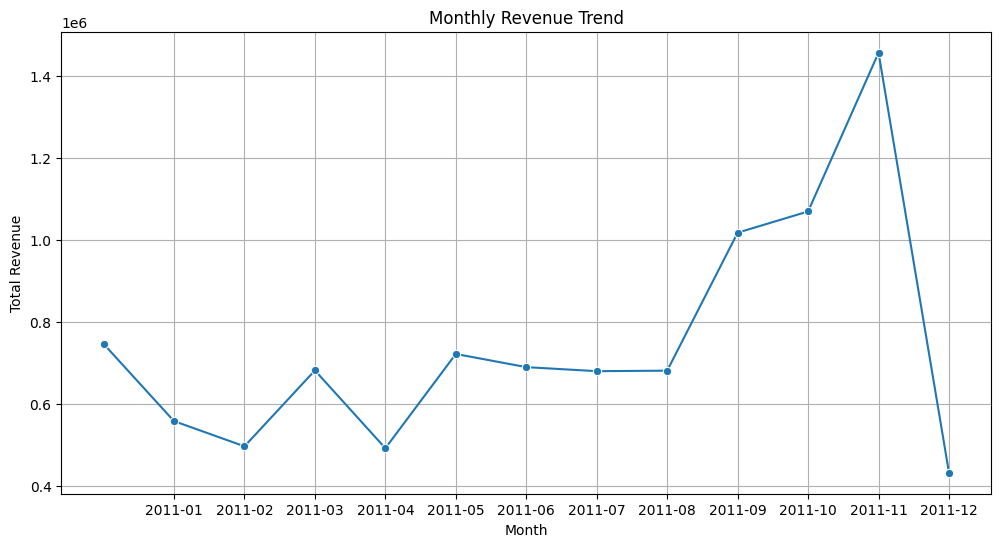

In [117]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_revenue, x='invoice_month', y='net_sales', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1,13))  # ensures months 1-12 are shown in order
plt.grid(True)
plt.savefig("figures/Monthly Revenue Trend.png", dpi=300, bbox_inches='tight')
plt.show()

In [61]:
# What are the daily sales patterns? 
daily_sales_pattern = df.groupby('invoice_day')['net_sales'].sum().reset_index()
daily_sales_pattern

,invoice_day,net_sales
0,Friday,1537958.621
1,Monday,1584895.301
2,Sunday,798659.461
3,Thursday,2108701.530
4,Tuesday,1965703.611
5,Wednesday,1730088.430


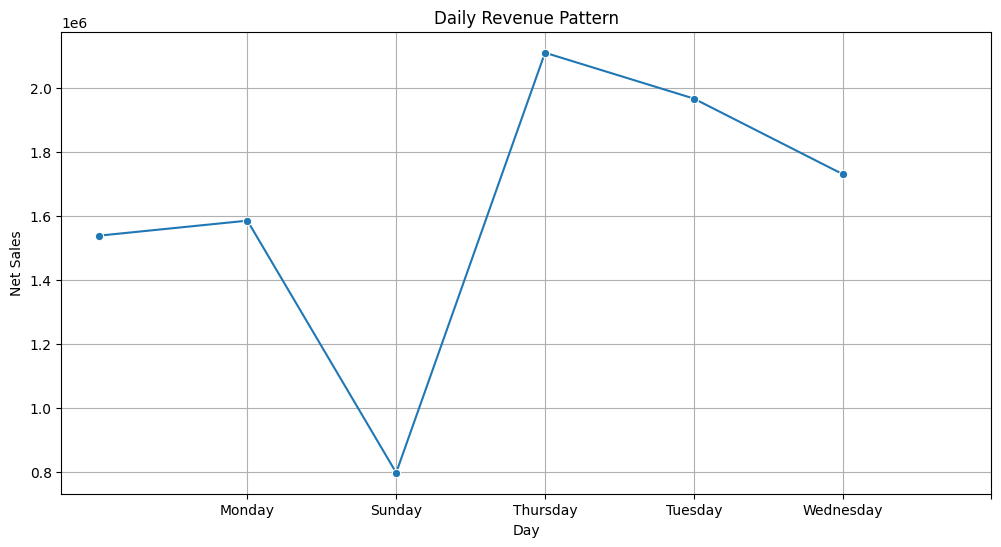

In [118]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_sales_pattern, x='invoice_day', y='net_sales', marker='o')
plt.title("Daily Revenue Pattern")
plt.xlabel("Day")
plt.ylabel("Net Sales")
plt.xticks(range(1,7)) 
plt.grid(True)
plt.savefig("figures/Daily Revenue Pattern.png", dpi=300, bbox_inches='tight')
plt.show()

In [67]:
# What are the hourly sales patterns? 
hourly_sales_pattern = df.groupby('invoice_hour')['net_sales'].sum().reset_index()
hourly_sales_pattern

,invoice_hour,net_sales
0,6,-497.350
1,7,31009.320
2,8,281723.020
3,9,766524.171
4,10,1327329.891
5,11,1146457.490
6,12,1357595.120
7,13,1172985.870
8,14,1091408.741
9,15,1186819.410


C:\Users\Faizan\AppData\Local\Temp\ipykernel_23160\2264271218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_sales_pattern, x='invoice_hour', y='net_sales', palette="viridis")


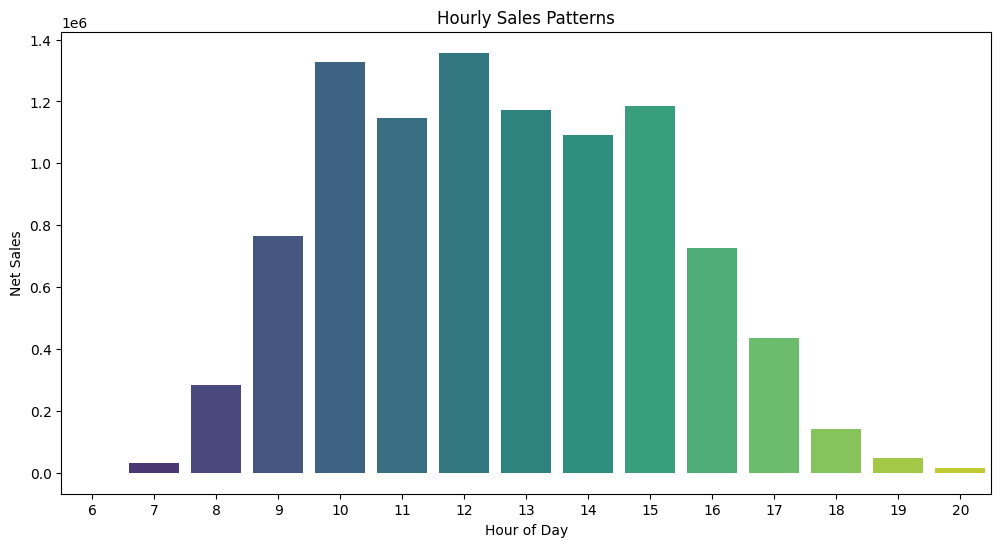

In [119]:
plt.figure(figsize=(12,6))
sns.barplot(data=hourly_sales_pattern, x='invoice_hour', y='net_sales', palette="viridis")
plt.title("Hourly Sales Patterns")
plt.xlabel("Hour of Day")
plt.ylabel("Net Sales")
plt.savefig("figures/Hourly Sales Patterns.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.2 Product & Category Analysis

In [69]:
# Which are the top-selling products by units sold?
top_products = df.groupby('stockcode')['quantity'].sum().sort_values(ascending=False).head(5)
top_products = top_products.reset_index()
top_products

,stockcode,quantity
0,22197,56427
1,84077,53751
2,85099B,47260
3,85123A,38811
4,84879,36122


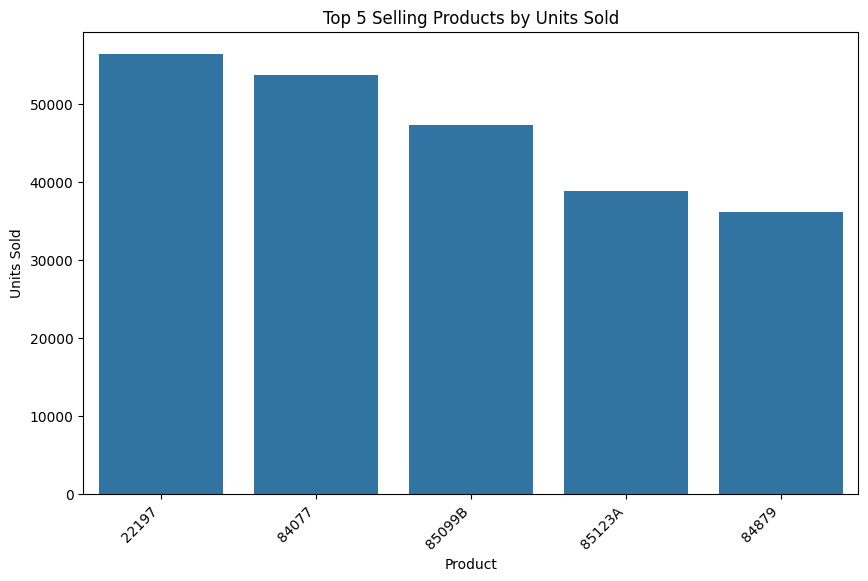

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_products, x='stockcode', y='quantity')
plt.title("Top 5 Selling Products by Units Sold")
plt.ylabel("Units Sold")
plt.xlabel("Product")
plt.xticks(rotation=45, ha='right')
plt.savefig("figures/Top 5 Selling Products by Units Sold.png", dpi=300, bbox_inches='tight')
plt.show()

In [73]:
# Which are the highest revenue-generating products?
high_Rev_products = df.groupby('stockcode')['net_sales'].sum().sort_values(ascending=False).head(5)
high_Rev_products = high_Rev_products.reset_index()
high_Rev_products

,stockcode,net_sales
0,DOT,206245.48
1,22423,164459.49
2,47566,98243.88
3,85123A,97838.45
4,85099B,92175.79


In [76]:
high_Rev_products = high_Rev_products.merge(
    df[['stockcode', 'description']].drop_duplicates(),
    on='stockcode',
    how='left')
print(high_Rev_products)

  stockcode  net_sales                         description
0       DOT  206245.48                      DOTCOM POSTAGE
1       DOT  206245.48                                 DOT
2     22423  164459.49            REGENCY CAKESTAND 3 TIER
3     22423  164459.49                               22423
4     47566   98243.88                       PARTY BUNTING
5    85123A   97838.45  WHITE HANGING HEART T-LIGHT HOLDER
6    85123A   97838.45                              85123A
7    85123A   97838.45         wrongly marked carton 22804
8    85123A   97838.45  CREAM HANGING HEART T-LIGHT HOLDER
9    85099B   92175.79             JUMBO BAG RED RETROSPOT


C:\Users\Faizan\AppData\Local\Temp\ipykernel_23160\2592734861.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


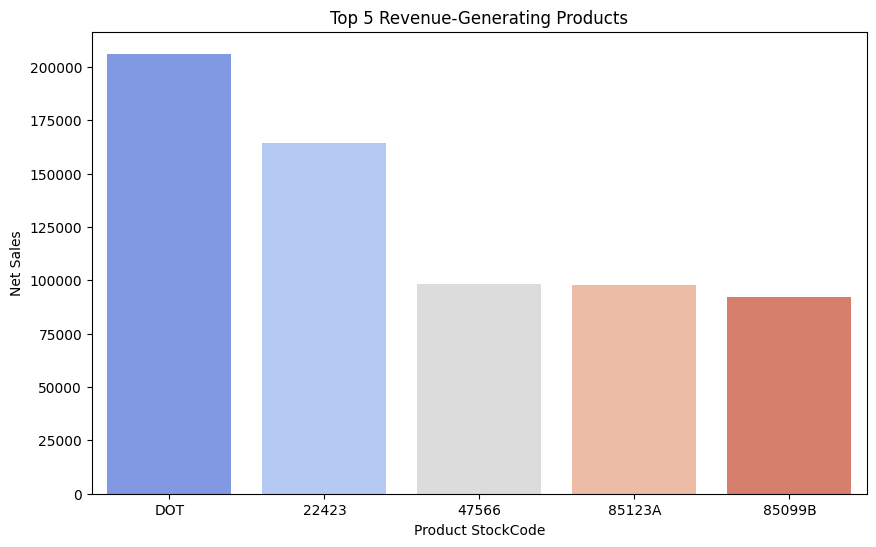

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=high_Rev_products, 
    x='stockcode', 
    y='net_sales', 
    palette='coolwarm'
)
plt.title("Top 5 Revenue-Generating Products")
plt.xlabel("Product StockCode")
plt.ylabel("Net Sales")
plt.savefig("figures/Top 5 Revenue-Generating Products.png", dpi=300, bbox_inches='tight')
plt.show()

In [123]:
# Which products have most returns? 
returns_per_product = df.groupby('stockcode')['is_return'].sum().sort_values(ascending=False).reset_index()
top_returns = returns_per_product.head(10)

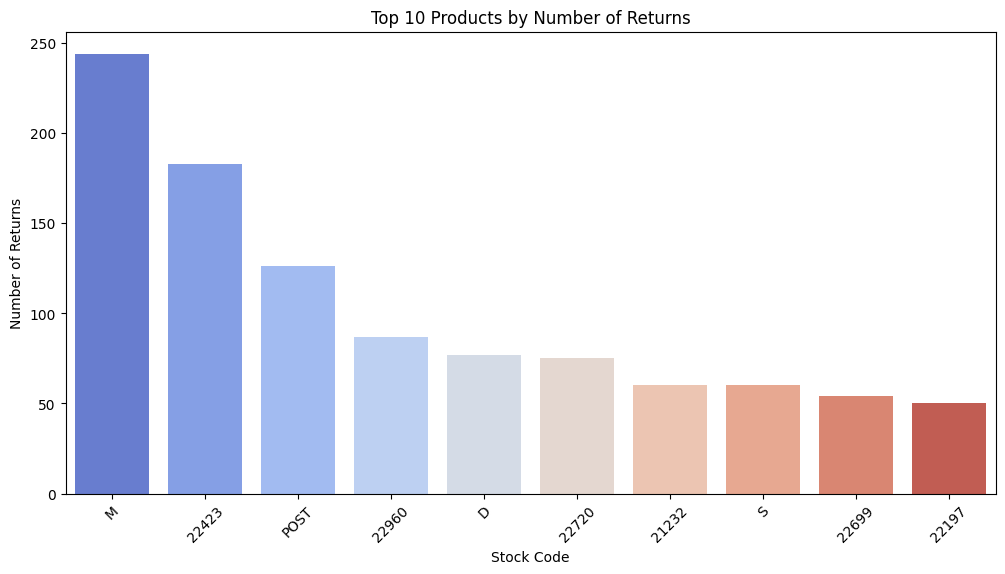

In [124]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_returns,
    x='stockcode', 
    y='is_return', 
    hue='stockcode',   
    dodge=False,
    palette='coolwarm',
    legend=False        
)
plt.title("Top 10 Products by Number of Returns")
plt.xlabel("Stock Code")
plt.ylabel("Number of Returns")
plt.xticks(rotation=45)
plt.savefig("figures/Top 10 Products by Number of Returns.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.3 Returns & Cancellations

In [135]:
# How many orders are returns or cancellations?
total_orders = df['invoiceno'].nunique()
total_orders

25900

In [136]:
total_returns = df['is_return'].sum()
total_returns

np.int64(10587)

In [137]:
total_cancellations = df['is_cancelled'].sum()
total_cancellations

np.int64(9251)

In [138]:
print(f"Return rate: {total_returns/total_orders:.2%}")
print(f"Cancellation rate: {total_cancellations/total_orders:.2%}")

Return rate: 40.88%
Cancellation rate: 35.72%


In [139]:
orders_summary = {
    'Type': ['Total Orders', 'Returns', 'Cancellations'],
    'Count': [total_orders, total_returns, total_cancellations]
}

orders_df = pd.DataFrame(orders_summary)

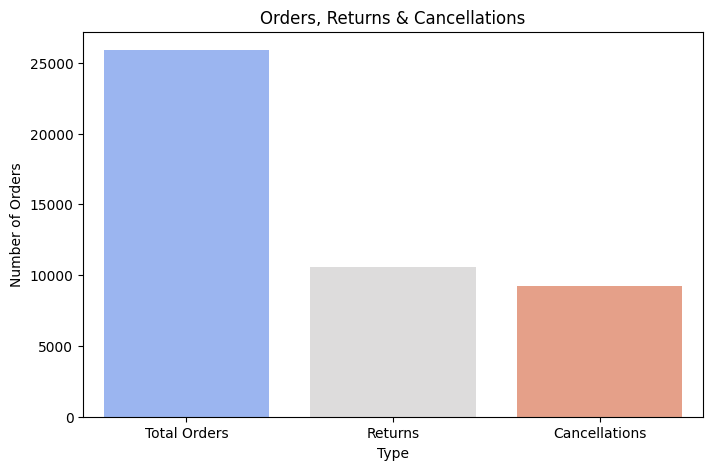

In [140]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=orders_df,
    x='Type',
    y='Count',
    hue='Type',       
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title("Orders, Returns & Cancellations")
plt.ylabel("Number of Orders")
plt.savefig("figures/Orders, Returns & Cancellations.png", dpi=300, bbox_inches='tight')
plt.show()

In [141]:
# Which countries have the highest return percentages?
country_summary = df.groupby('country').agg(
    total_orders=('invoiceno', 'nunique'),
    total_returns=('is_return', 'sum')
)

# Calculate return percentage
country_summary['return_percentage'] = (country_summary['total_returns'] / country_summary['total_orders']) * 100

# Sort descending by return percentage
top_return_countries  = country_summary.sort_values('return_percentage', ascending=False)
top_return_countries = top_return_countries.head(10)

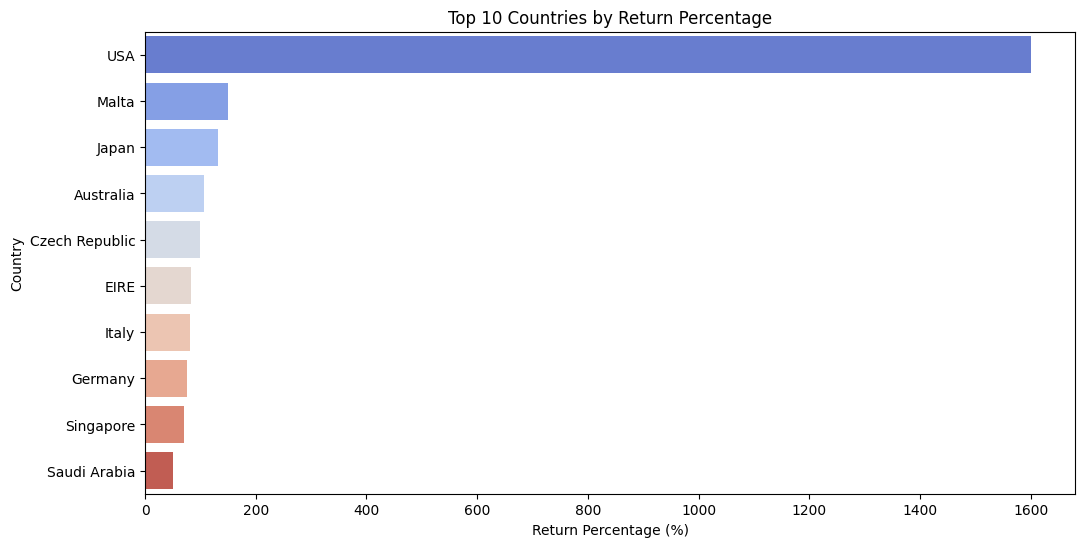

In [143]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_return_countries,
    y=top_return_countries.index,   
    x='return_percentage',
    hue=top_return_countries.index, 
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title("Top 10 Countries by Return Percentage")
plt.xlabel("Return Percentage (%)")
plt.ylabel("Country")
plt.savefig("figures/Top 10 Countries by Return Percentage.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.4 Customer Analysis

In [126]:
# Who are the top customers by revenue?
top_customers = df.groupby('customerid')['net_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_customers 

,customerid,net_sales
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187322.17
3,14911.0,132458.73
4,12415.0,123725.45


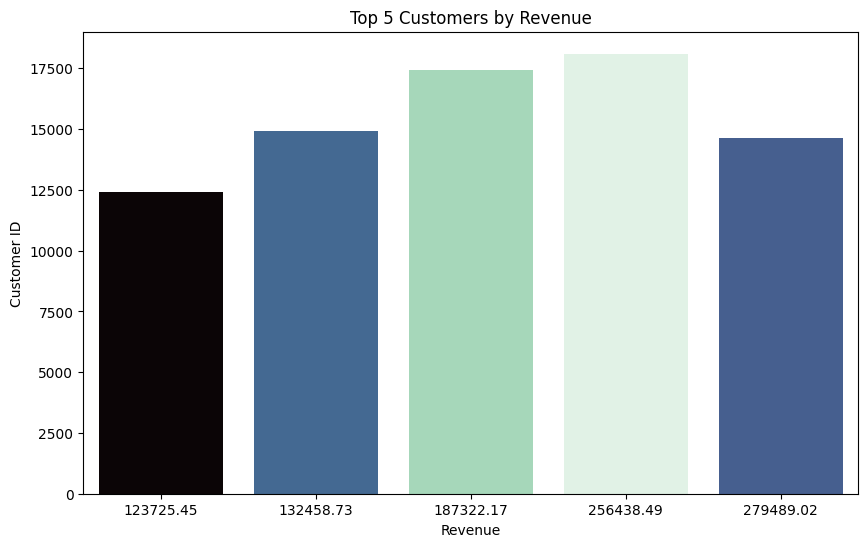

In [127]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_customers,
    y='customerid',      
    x='net_sales',
    hue='customerid',     
    dodge=False,
    palette='mako',
    legend=False
)
plt.title("Top 5 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.savefig("figures/Top 5 Customers by Revenue.png", dpi=300, bbox_inches='tight')
plt.show()

In [128]:
# Who are the most frequent buyers?

# Count number of invoices per customer
customer_freq = df.dropna(subset=['customerid']).groupby('customerid')['invoiceno'].nunique().reset_index()

# Rename column for clarity
customer_freq = customer_freq.rename(columns={'invoiceno':'num_orders'})

# Sort to find top buyers
top_customers = customer_freq.sort_values('num_orders', ascending=False).head(10)

print(top_customers)


      customerid  num_orders
1895     14911.0         248
330      12748.0         224
4042     17841.0         169
1674     14606.0         128
2192     15311.0         118
568      13089.0         118
487      12971.0          89
1615     14527.0          86
803      13408.0          81
1703     14646.0          77


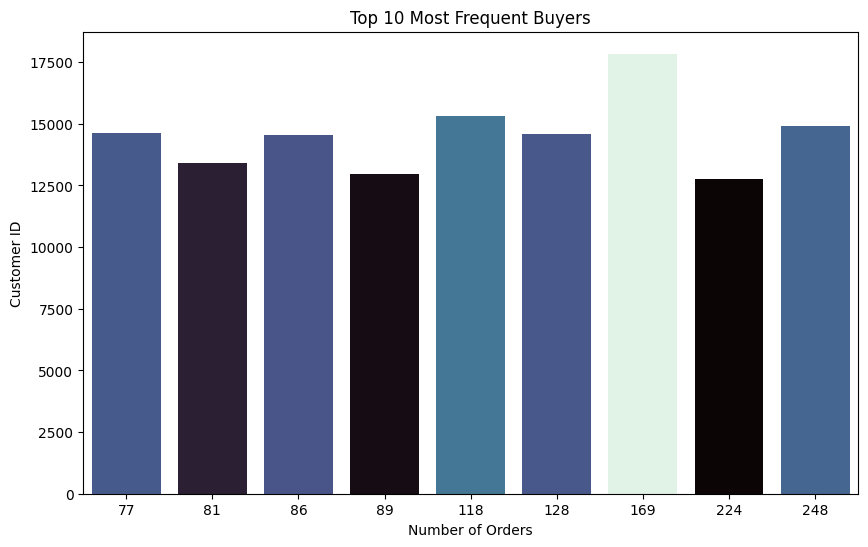

In [129]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_customers,
    y='customerid',       
    x='num_orders',
    hue='customerid',      
    dodge=False,
    palette='mako',
    legend=False
)
plt.title("Top 10 Most Frequent Buyers")
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.savefig("figures/Top 10 Most Frequent Buyers.png", dpi=300, bbox_inches='tight')
plt.show()

In [130]:
# How does average order value vary by customer?
# Drop missing customer IDs
df_customers = df.dropna(subset=['customerid'])

customer_summary = df_customers.groupby('customerid').agg({
    'net_sales': 'sum',
    'invoiceno': 'nunique'
}).rename(columns={'invoiceno':'num_orders'})

customer_summary['avg_order_value'] = customer_summary['net_sales'] / customer_summary['num_orders']

# See top 5 
top_aov = customer_summary.sort_values('avg_order_value', ascending=False).head(5)
print(top_aov)

            net_sales  num_orders  avg_order_value
customerid                                        
12357.0       6207.67           1      6207.670000
15749.0      21535.90           4      5383.975000
12688.0       4873.81           1      4873.810000
12415.0     123725.45          26      4758.671154
12752.0       4366.78           1      4366.780000


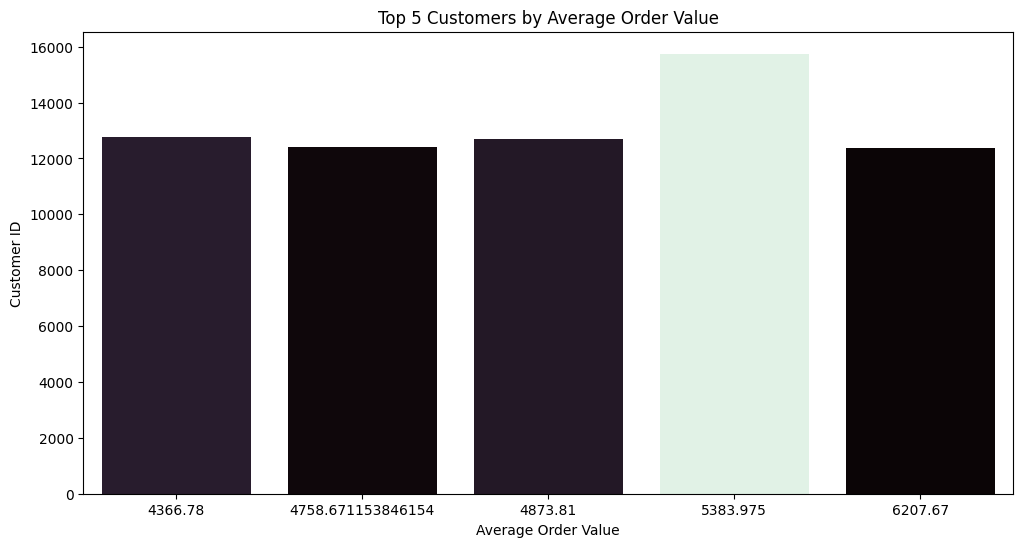

In [131]:
top_aov_plot = top_aov.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_aov_plot,
    y='customerid',        
    x='avg_order_value',
    hue='customerid',     
    dodge=False,
    palette='mako',
    legend=False
)
plt.title("Top 5 Customers by Average Order Value")
plt.xlabel("Average Order Value")
plt.ylabel("Customer ID")
plt.savefig("figures/Top 5 Customers by Average Order Value.png", dpi=300, bbox_inches='tight')
plt.show()

## 3.5 Regional Analysis

In [132]:
# Which countries/regions generate the most revenue? 
top_countries = df.groupby('country')['net_sales'].sum().sort_values(ascending=False).head(5).reset_index()
top_countries

,country,net_sales
0,United Kingdom,8167128.184
1,Netherlands,284661.540
2,EIRE,262993.380
3,Germany,221509.470
4,France,197317.110


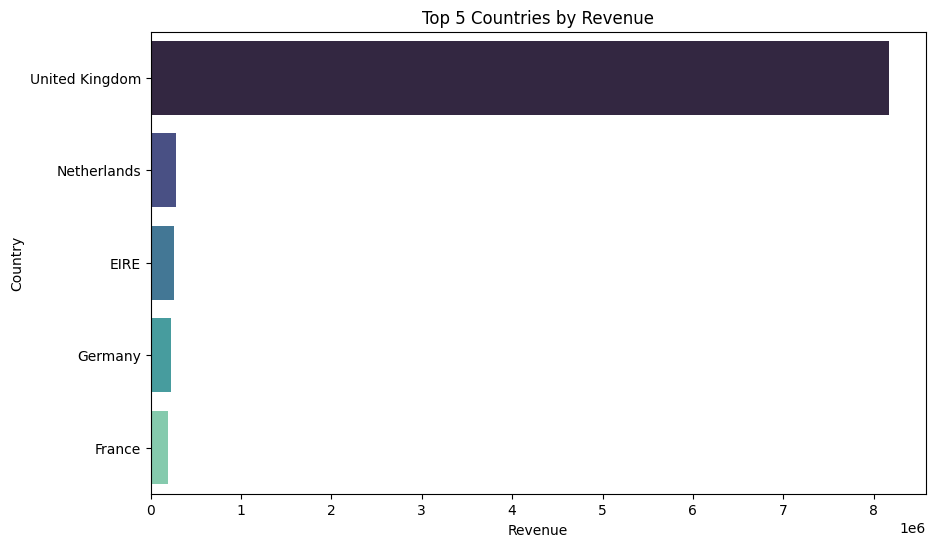

In [134]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_countries,
    x='net_sales',
    y='country',
    hue='country',      
    dodge=False,
    palette='mako',
    legend=False
)
plt.title("Top 5 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.savefig("figures/Top 5 Countries by Revenue.png", dpi=300, bbox_inches='tight')
plt.show()